# Zillow Zestimate error

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com). 

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [1]:
import pandas as pd

import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from scipy.stats import pearsonr, ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 

In [2]:
path = './'
df_prop = pd.read_csv(path + "properties_2016.csv")
df_log = pd.read_csv(path + "train_2016_v2.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_merge = df_prop.merge(df_log, on='parcelid',how='inner')
df_merge.duplicated().sum()

0

In [4]:
df = df_merge[['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']]
df.shape

(90275, 11)

### Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 11 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.3 MB


In [6]:
df2 = df.fillna(0)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 11 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
fullbathcnt                     90275 non-null float64
garagecarcnt                    90275 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       90275 non-null float64
taxvaluedollarcnt               90275 non-null float64
taxamount                       90275 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.3 MB


In [8]:
df2 = df.drop_duplicates(subset='parcelid', keep='first', inplace=False)
df2.shape

(90150, 11)

In [9]:
df2.dtypes

parcelid                          int64
logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
dtype: object

In [10]:
df2

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,17073783,0.0953,2.5,3.0,1264.0,2.0,2.0,5.0,1986.0,191811.0,2015.06
1,17088994,0.0198,1.0,2.0,777.0,1.0,1.0,4.0,1990.0,239679.0,2581.30
2,17100444,0.0060,2.0,3.0,1101.0,2.0,2.0,5.0,1956.0,47853.0,591.64
3,17102429,-0.0566,1.5,2.0,1554.0,1.0,2.0,5.0,1965.0,62914.0,682.78
4,17109604,0.0573,2.5,4.0,2415.0,2.0,2.0,8.0,1984.0,554000.0,5886.92
5,17125829,0.0564,2.5,4.0,2882.0,2.0,2.0,8.0,1980.0,289609.0,3110.44
6,17132911,0.0315,2.0,3.0,1772.0,2.0,2.0,6.0,1978.0,526000.0,5632.20
7,17134926,0.0257,2.5,5.0,2632.0,2.0,2.0,8.0,1971.0,571086.0,6109.94
8,17139988,0.0020,2.0,3.0,1292.0,2.0,2.0,6.0,1979.0,462594.0,5026.40
9,17167359,-0.0576,1.0,3.0,1385.0,1.0,1.0,6.0,1950.0,268502.0,3217.06


In [11]:
df2[df2.bathroomcnt == 0].count()

parcelid                        1159
logerror                        1159
bathroomcnt                     1159
bedroomcnt                      1159
calculatedfinishedsquarefeet     510
fullbathcnt                        0
garagecarcnt                     218
roomcnt                         1159
yearbuilt                        492
taxvaluedollarcnt               1159
taxamount                       1159
dtype: int64

In [12]:
df2 = df2.drop(df2[df2.bathroomcnt == 0].index)

In [13]:
df2.describe()

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
count,8.899100e+04,88991.000000,88991.000000,88991.000000,88982.000000,88974.000000,29679.000000,88991.000000,88905.000000,8.899000e+04,88985.000000
mean,1.297212e+07,0.011450,2.309234,3.070603,1768.921523,2.241172,1.823276,1.495927,1968.591722,4.576632e+05,5973.263868
std,2.507768e+06,0.158423,0.976144,1.111178,924.388110,0.963106,0.592598,2.831608,23.766790,5.537837e+05,6807.681721
min,1.071174e+07,-4.605000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000
25%,1.155593e+07,-0.025300,2.000000,2.000000,1182.000000,2.000000,2.000000,0.000000,1953.000000,2.003985e+05,2881.190000
50%,1.254235e+07,0.006000,2.000000,3.000000,1538.000000,2.000000,2.000000,0.000000,1970.000000,3.435255e+05,4544.600000
75%,1.421961e+07,0.038300,3.000000,4.000000,2089.750000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6892.940000
max,1.629608e+08,4.737000,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000


#### Create a variable, `colnames`, that is a list of the column names. 

In [14]:
colnames= ['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']
colnames

['parcelid',
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'garagecarcnt',
 'roomcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount']

#### independent variable names (aka attributes) 

In [15]:
x_vars = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']


#### dependent (target) variable. 

dependent variable: 'logerror', continuous

#### View the distribution of the numeric variables

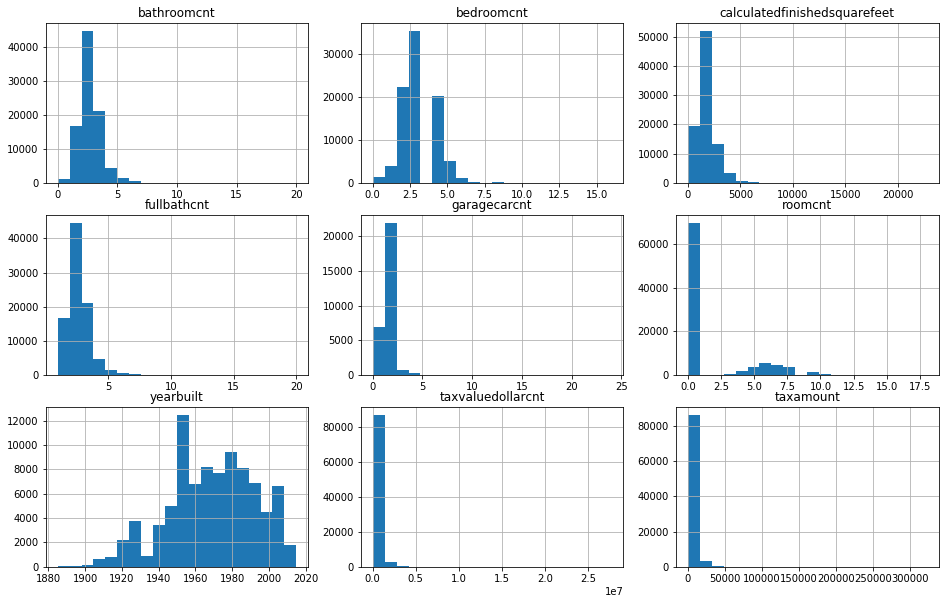

In [16]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']):
    plot_number = i + 1 
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

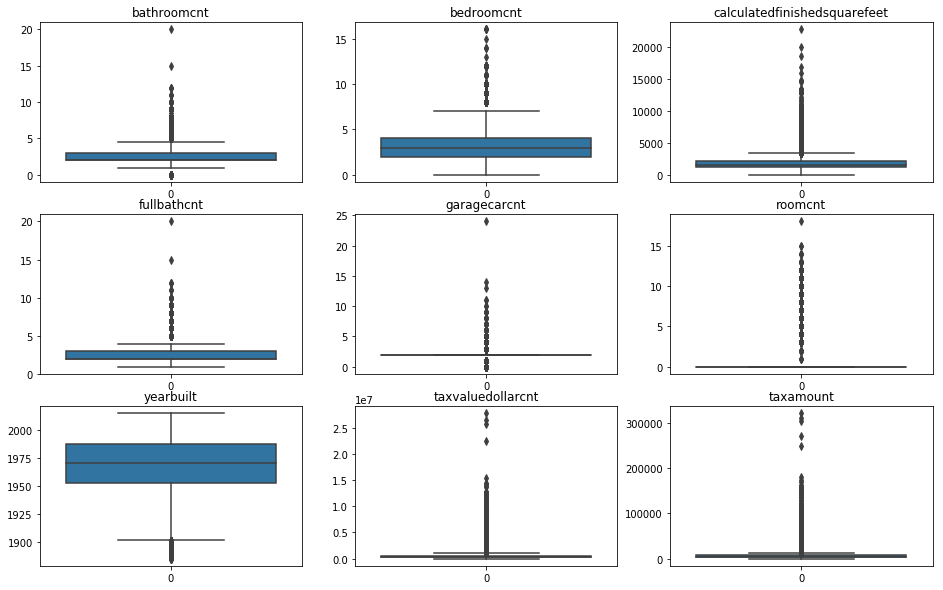

In [17]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    sns.boxplot(data=series)
    

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

In [18]:
df2 = df2.assign(rmcount=df2.bathroomcnt+df2.bedroomcnt)
df2 = df2.assign(value_per_sq_ft=df2.taxvaluedollarcnt/df2.calculatedfinishedsquarefeet)
df2 = df2.drop(df2[(df2.value_per_sq_ft).isnull()].index)
df2 = df2.drop(df2[(df2.value_per_sq_ft > 7000)].index)
df2.sort_values(['value_per_sq_ft'], ascending=True)

df2 = df2.drop(df2[(df2.yearbuilt).isnull()].index)
df2 = df2.assign(age_of_property=2016-df2.yearbuilt)
df2.describe()

df2.sort_values(['value_per_sq_ft'], ascending=False)

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,rmcount,value_per_sq_ft,age_of_property
14950,10902671,0.0602,3.0,4.0,120.0,3.0,NaN,0.0,1939.0,788975.0,9622.16,7.0,6574.791667,77.0
37529,11683635,0.0218,3.0,4.0,1982.0,3.0,NaN,0.0,1952.0,12750000.0,147539.80,7.0,6432.896065,64.0
84657,13895524,0.1275,2.0,2.0,1556.0,2.0,NaN,4.0,1960.0,9000000.0,93743.68,4.0,5784.061697,56.0
77251,11686116,-0.2095,4.0,2.0,2551.0,4.0,NaN,0.0,1972.0,12178013.0,140719.67,6.0,4773.819287,44.0
18674,11679245,0.0050,5.0,2.0,3163.0,5.0,NaN,0.0,1953.0,13797600.0,162551.69,7.0,4362.187796,63.0
21735,11687707,-0.0202,2.0,3.0,1827.0,2.0,NaN,0.0,1957.0,7950000.0,92078.47,5.0,4351.395731,59.0
50654,11682691,0.0573,3.0,3.0,2550.0,3.0,NaN,0.0,1930.0,11091409.0,128350.24,6.0,4349.572157,86.0
22437,14400650,0.0592,1.0,1.0,384.0,1.0,NaN,3.0,1928.0,1659000.0,20836.62,2.0,4320.312500,88.0
47538,11682776,-0.0419,1.0,2.0,1184.0,1.0,NaN,0.0,1961.0,4982405.0,48888.58,3.0,4208.112331,55.0
10134,11688847,2.4570,3.0,2.0,1736.0,3.0,NaN,0.0,1955.0,6584146.0,99452.76,5.0,3792.710829,61.0


#### Split data into training and test datasets

In [19]:
X = df2.drop(['logerror', 'roomcnt', 'garagecarcnt', 'fullbathcnt'], axis=1) #make sure to use capital X
y = df2[['logerror']] #y is dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1) #axis = columns
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Create a jointplot for each independent variable with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

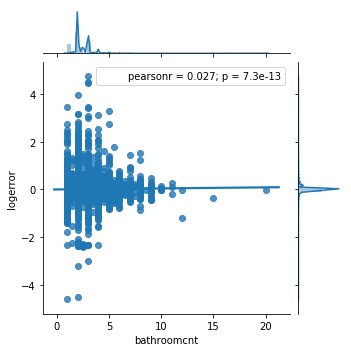

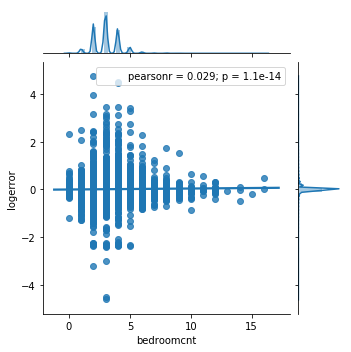

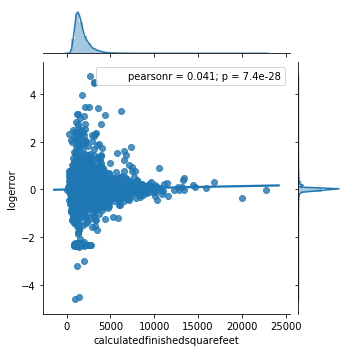

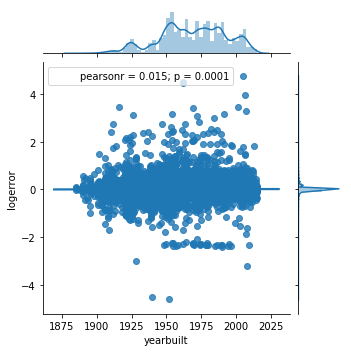

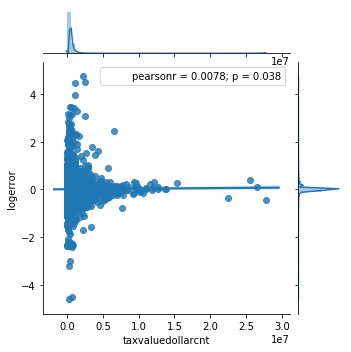

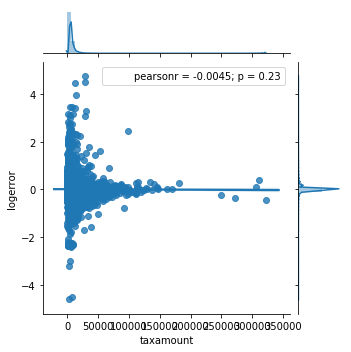

In [20]:
for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']):
    plot_number = i + 1 
    series = df[col]
    j = sns.jointplot(col, "logerror", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


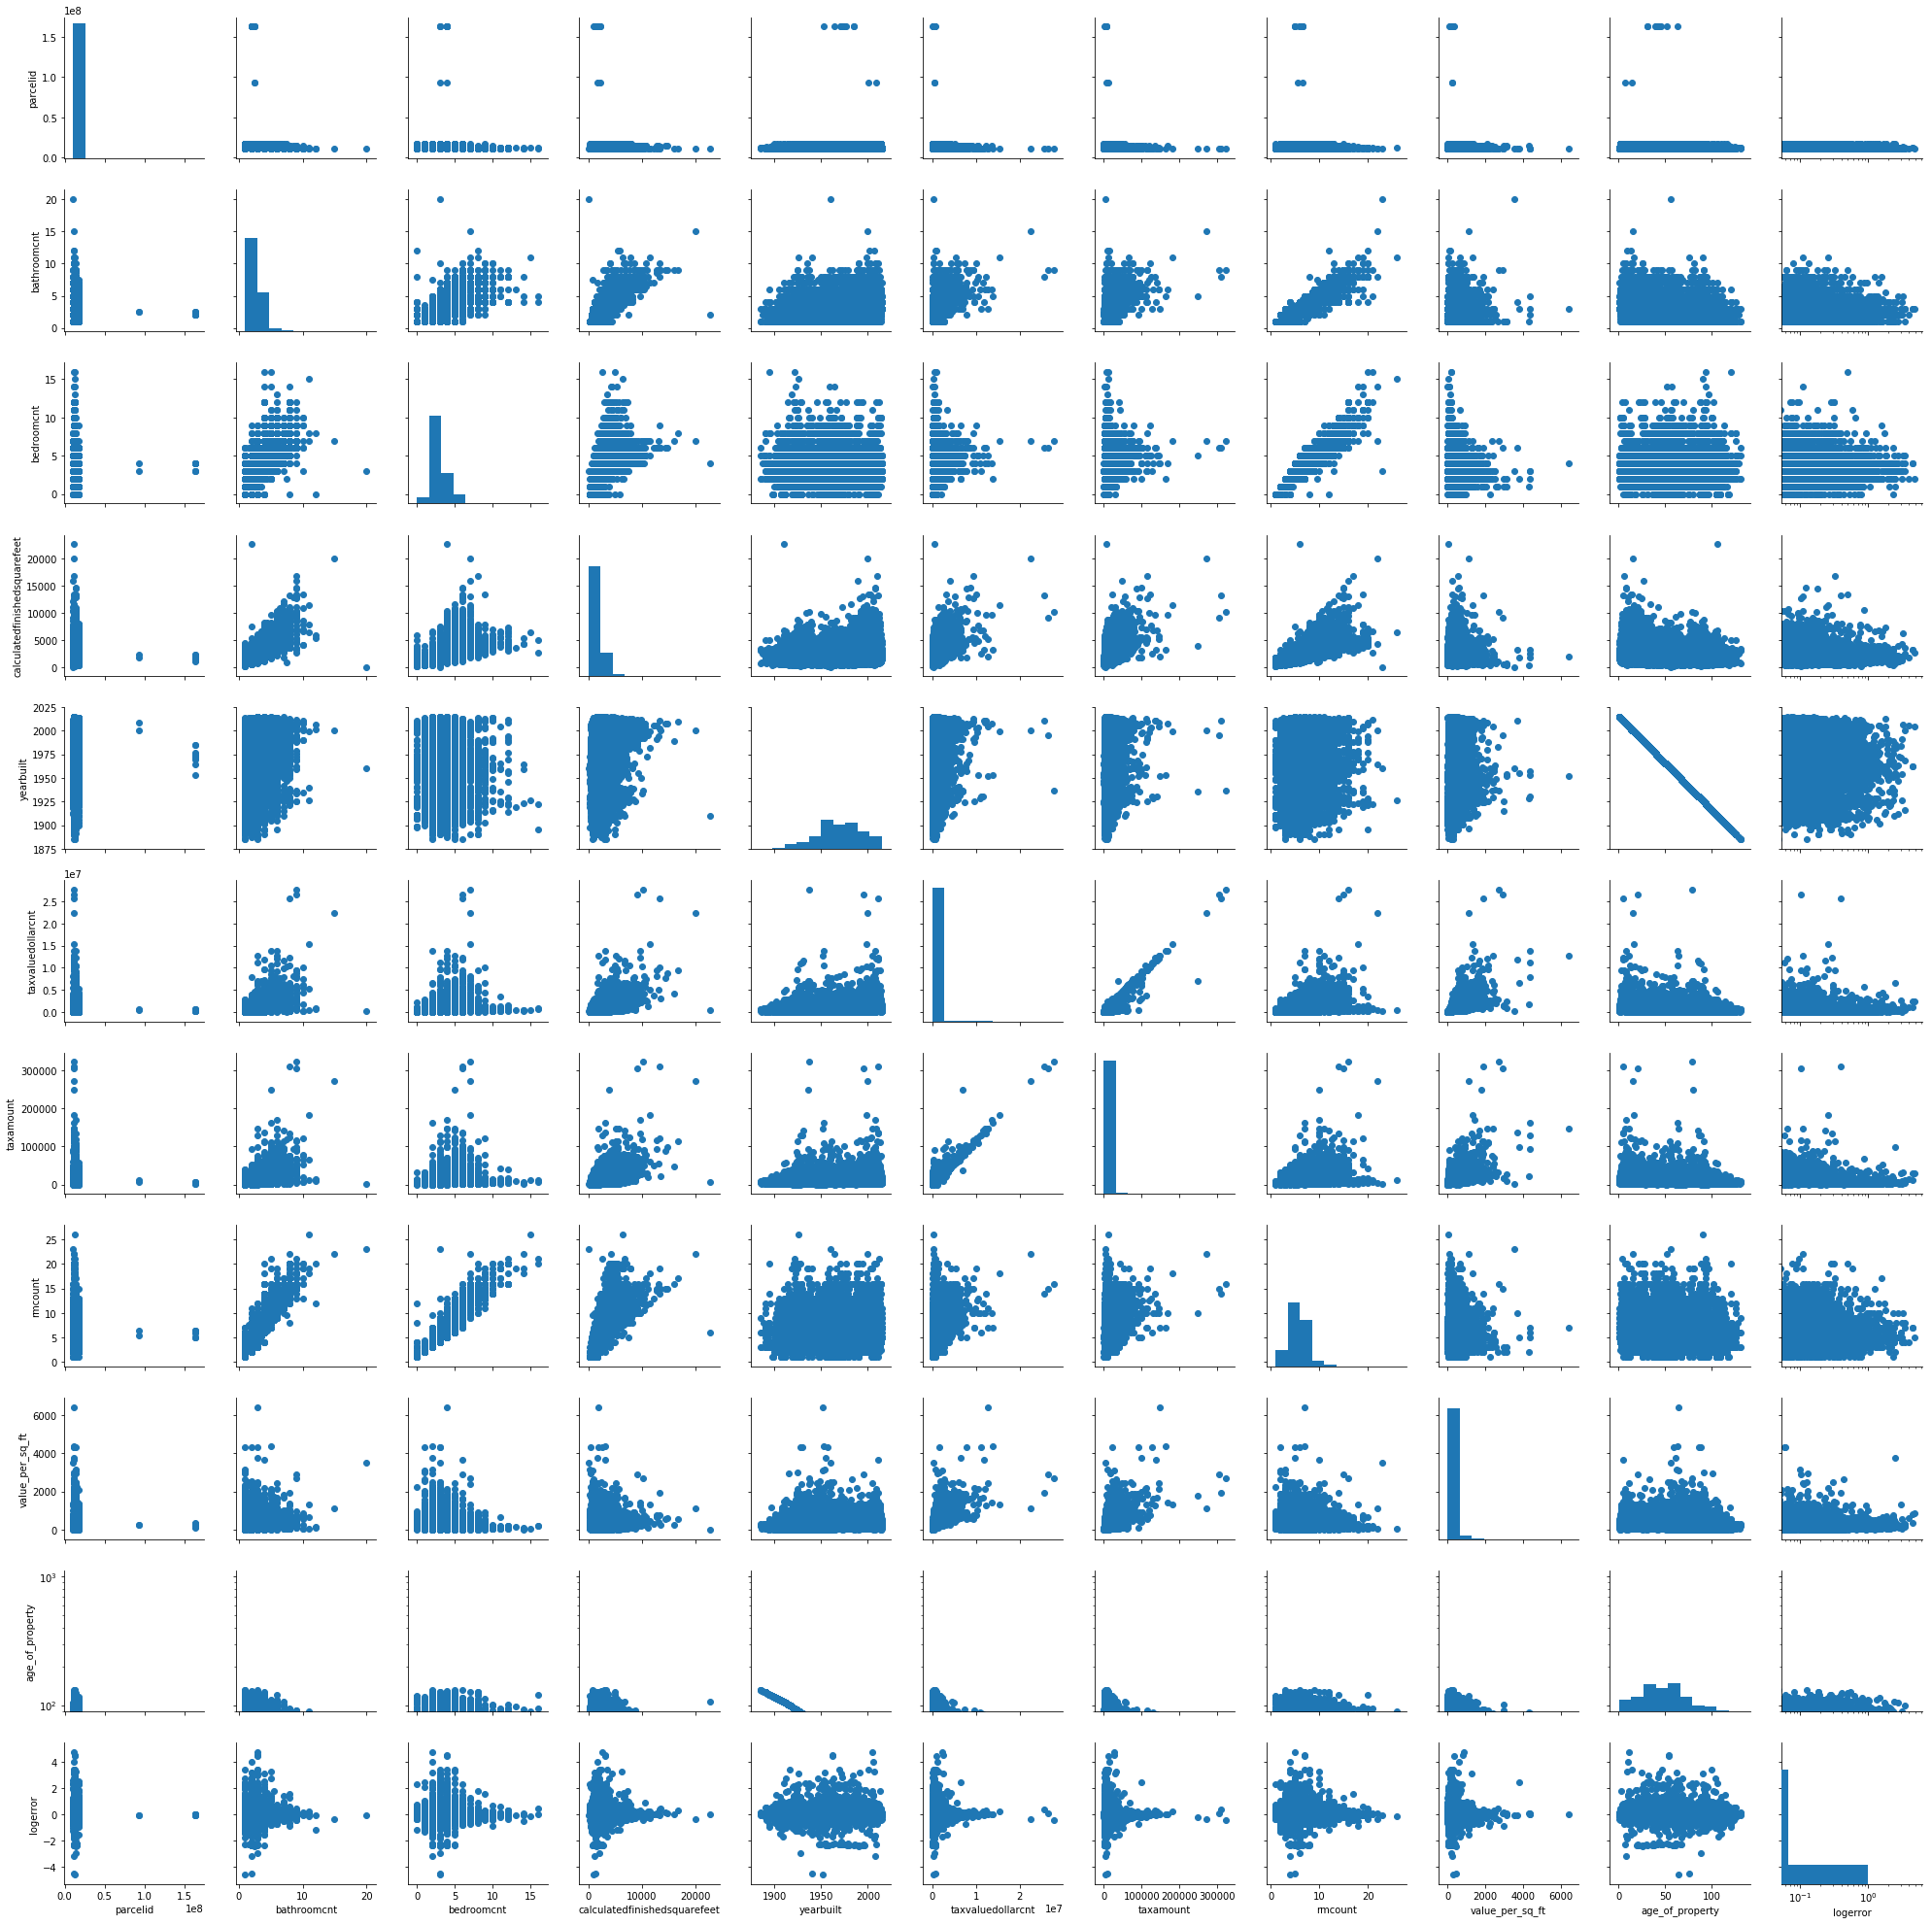

In [21]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Create a heatmap of the correlation between each variable pair.

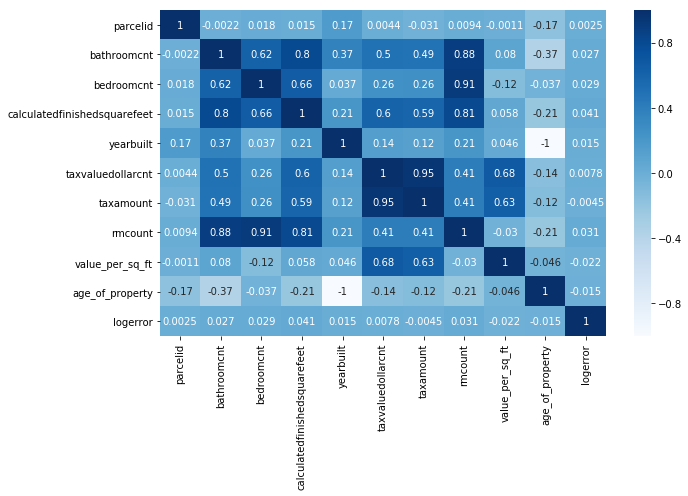

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

#### Summarize your conclusions from all of these steps.  

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [23]:
train3 = train[train.bedroomcnt == 3]
train5 = train[train.bedroomcnt >= 5]

ttest_ind(train5.logerror, train3.logerror)

Ttest_indResult(statistic=5.536271182524083, pvalue=3.112757428300649e-08)

In [24]:
ols_model = sm.OLS(train3.logerror, train3.bedroomcnt)
fit = ols_model.fit()
fit.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 22 Mar 2019   Prob (F-statistic):                nan
Time:                        15:28:13   Log-Likelihood:                 13636.
No. Observations:               28270   AIC:                        -2.727e+04
Df Residuals:                   28269   BIC:                        -2.726e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedroomcnt     0.0037      0.000     12.447      0.000       0.003       0.004
==============================================================================
Omnibus:                    14097.593   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31183174.544
Skew:                           0.730   Prob(JB):                         0.00
Kurtosis:                     165.699   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ols_model = sm.OLS(train5.logerror, train5.bedroomcnt)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     85.92
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.64e-20
Time:                        15:28:13   Log-Likelihood:                 1473.1
No. Observations:                5468   AIC:                            -2944.
Df Residuals:                    5467   BIC:                            -2937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedroomcnt     0.0042      0.000      9.269      0.000       0.003       0.005
==============================================================================
Omnibus:                     5233.174   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1478381.769
Skew:                           3.950   Prob(JB):                         0.00
Kurtosis:                      83.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [26]:
train_bath1 = train[train.bathroomcnt <= 3]
train_bath2 = train[train.bathroomcnt >= 4]

ttest_ind(train_bath1.logerror, train_bath2.logerror)

Ttest_indResult(statistic=-6.016379566395594, pvalue=1.7923990095350131e-09)

In [27]:
ols_model = sm.OLS(train_bath1.logerror, train_bath1.bathroomcnt)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           5.16e-69
Time:                        15:28:13   Log-Likelihood:                 29269.
No. Observations:               64890   AIC:                        -5.854e+04
Df Residuals:                   64889   BIC:                        -5.853e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathroomcnt     0.0048      0.000     17.579      0.000       0.004       0.005
==============================================================================
Omnibus:                    50221.662   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64815080.036
Skew:                           2.348   Prob(JB):                         0.00
Kurtosis:                     157.759   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
ols_model = sm.OLS(train_bath2.logerror, train_bath2.bathroomcnt)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     77.11
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.14e-18
Time:                        15:28:13   Log-Likelihood:                 1043.9
No. Observations:                5371   AIC:                            -2086.
Df Residuals:                    5370   BIC:                            -2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathroomcnt     0.0050      0.001      8.781      0.000       0.004       0.006
==============================================================================
Omnibus:                     4616.588   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           785499.213
Skew:                           3.410   Prob(JB):                         0.00
Kurtosis:                      61.851   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## train ols room count

In [29]:
ols_model = sm.OLS(train.logerror, train.rmcount)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     448.9
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.57e-99
Time:                        15:28:13   Log-Likelihood:                 30472.
No. Observations:               71118   AIC:                        -6.094e+04
Df Residuals:                   71117   BIC:                        -6.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rmcount        0.0022      0.000     21.187      0.000       0.002       0.002
==============================================================================
Omnibus:                    56622.585   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58693900.139
Skew:                           2.534   Prob(JB):                         0.00
Kurtosis:                     143.647   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## train ols value per square foot

In [30]:
ols_model = sm.OLS(train.logerror, train.value_per_sq_ft)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.00e-35
Time:                        15:28:13   Log-Likelihood:                 30326.
No. Observations:               71118   AIC:                        -6.065e+04
Df Residuals:                   71117   BIC:                        -6.064e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
value_per_sq_ft  2.383e-05   1.91e-06     12.484      0.000    2.01e-05    2.76e-05
==============================================================================
Omnibus:                    56337.632   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57846355.402
Skew:                           2.512   Prob(JB):                         0.00
Kurtosis:                     142.628   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## train ols age of property

In [31]:
ols_model = sm.OLS(train.logerror, train.age_of_property)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     246.7
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.72e-55
Time:                        15:28:13   Log-Likelihood:                 30372.
No. Observations:               71118   AIC:                        -6.074e+04
Df Residuals:                   71117   BIC:                        -6.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age_of_property     0.0002   1.12e-05     15.705      0.000       0.000       0.000
==============================================================================
Omnibus:                    56257.331   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58299862.721
Skew:                           2.502   Prob(JB):                         0.00
Kurtosis:                     143.176   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 
Created a new room count column that is the sum of bathroom count and bedroom count, after removing the column for full bath and removing bathroom counts that were zero. 

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)


#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  



## LM1 - Room count

In [32]:
lm1 = LinearRegression() 
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [33]:
lm1.fit(X_train[['rmcount']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [34]:
#parameters
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

[-0.00254529]
[[0.00262152]]


## Predict

In [35]:
y_pred_lm1 = lm1.predict(X_train[['rmcount']])
print(y_pred_lm1)

[[0.00925157]
 [0.00794081]
 [0.01056233]
 ...
 [0.01056233]
 [0.00531928]
 [0.01056233]]


## Evaluate

In [36]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 0.0249


In [37]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('R squared value for lm1: {:.2%}'.format(r2_lm1))

R squared value for lm1: 0.10%


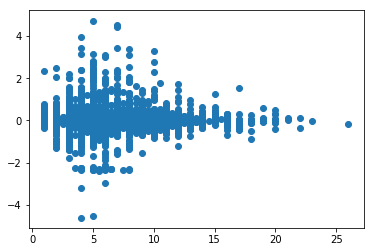

In [38]:
plt.scatter(X_train[['rmcount']], y_train)

## LM2- Tax amount

In [39]:
lm2 = LinearRegression() 
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [40]:
lm2.fit(X_train[['value_per_sq_ft']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [41]:
#parameters
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[0.01645496]
[[-1.9389805e-05]]


## Predict

In [42]:
y_pred_lm2 = lm2.predict(X_train[['value_per_sq_ft']])
print(y_pred_lm2)

[[0.0088123 ]
 [0.0124881 ]
 [0.01179504]
 ...
 [0.01354914]
 [0.01569978]
 [0.01272278]]


## Evaluate

In [43]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm1)) 

lm2
  mse: 0.0249


In [44]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('R squared value for lm2: {:.2%}'.format(r2_lm2))

R squared value for lm2: 0.05%


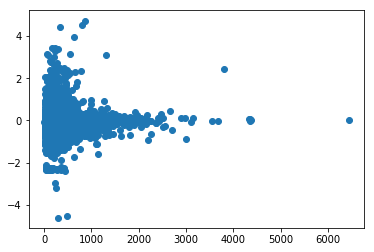

In [45]:
plt.scatter(X_train[['value_per_sq_ft']], y_train)

## LM3- Age of property

In [46]:
lm3 = LinearRegression() 
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [47]:
lm3.fit(X_train[['age_of_property']], y_train)
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [48]:
#parameters
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

[0.01613522]
[[-9.66637577e-05]]


## Predict

In [49]:
y_pred_lm3 = lm3.predict(X_train[['age_of_property']])
print(y_pred_lm3)

[[0.0132353 ]
 [0.01333197]
 [0.01130203]
 ...
 [0.01246199]
 [0.00975541]
 [0.01188201]]


## Evaluate

In [50]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 0.0249


In [53]:
r2_lm3 = r2_score(y_train, y_pred_lm3)
print('R squared value for lm3: {:.2%}'.format(r2_lm3))

R squared value for lm3: 0.02%


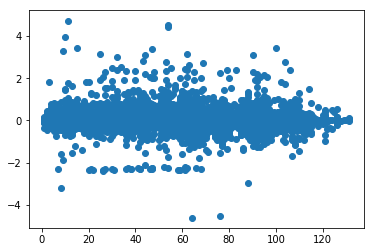

In [54]:
plt.scatter(X_train[['age_of_property']], y_train)

## Plot Residuals

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.